# Обработка изображений и компьютерное зрение

### Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('foto.jpg')
print(img.shape)

(1200, 1920, 3)


In [3]:
print(img[:5, :5, :])

[[[10 25 20]
  [ 1 13  9]
  [ 1 10  9]
  [12 16 17]
  [10 12 11]]

 [[ 0  7  5]
  [ 0  3  2]
  [ 0  2  2]
  [ 0  2  1]
  [ 5  5  3]]

 [[ 0  7 13]
  [ 1  6 10]
  [ 0  4  5]
  [ 1  1  0]
  [ 4  5  0]]

 [[13 12 26]
  [ 8  8 16]
  [ 7  7  7]
  [ 9  8  3]
  [ 6  5  0]]

 [[ 7  2 22]
  [ 2  0 10]
  [ 2  0  1]
  [ 6  6  0]
  [ 7  6  1]]]


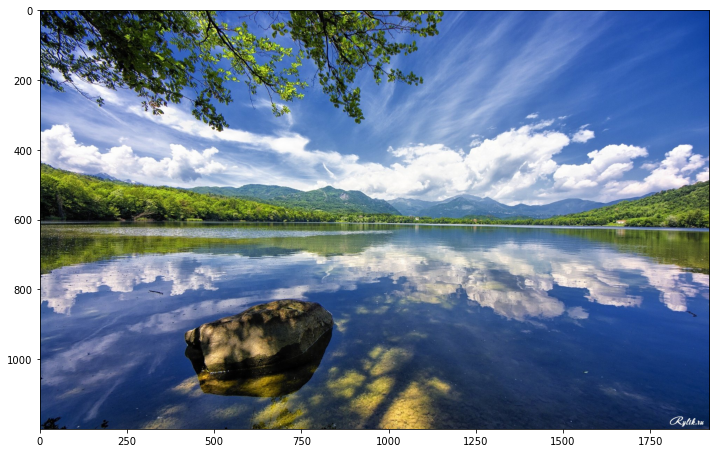

In [4]:
plt.figure(figsize=(12, 12))
plt.imshow(img);

#### Реализация алгоритма фильтрации на Python

Размытие

In [5]:
def my_median_filter(x):

    return np.median(x)

In [6]:
win_size = (9, 9) 

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = my_median_filter(x)

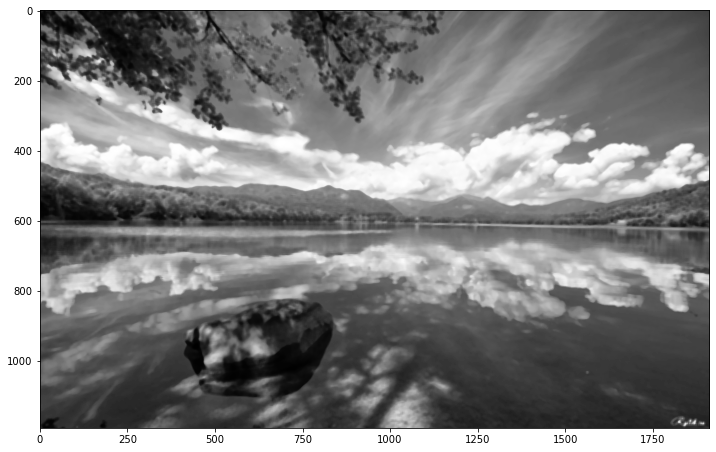

In [7]:
plt.figure(figsize=(12, 12))
plt.imshow(out_img, cmap='gray');

Фильтрация по порогу

In [9]:
img_threshold = img.astype(np.float32) / 255. 

In [10]:
threshold = 0.65 
img_bw = np.mean(img_threshold, axis=2)
img_bin = (img_bw > threshold).astype(np.uint8)

In [11]:
img_bin[:5, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

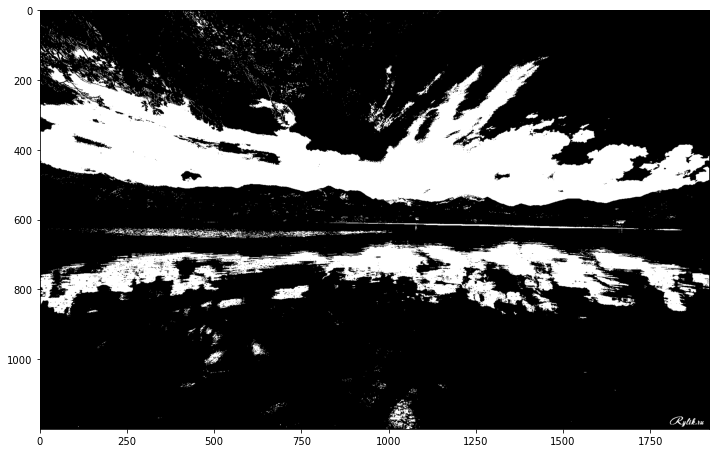

In [12]:
plt.figure(figsize=(12, 12))
plt.imshow(img_bin*255, cmap='gray');

Фильтрация горизонтальных границ на изображении

In [13]:
win_size = (3, 3)
w = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


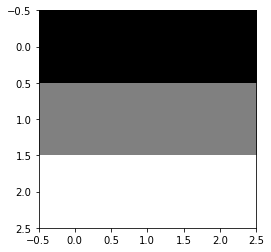

In [15]:
print(w)
plt.imshow(w, cmap='gray');

In [16]:
img_new = img[:,:,0].astype(np.float32) / 255.
print(img.shape)

(1200, 1920, 3)


In [17]:
%%time

out_img = np.zeros(
    (img_new.shape[0] - w.shape[0] + 1,
     img_new.shape[1] - w.shape[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_new[i:i+w.shape[0], j:j+w.shape[1]]

        out_img[i,j] = np.sum(w * x)

Wall time: 31.3 s


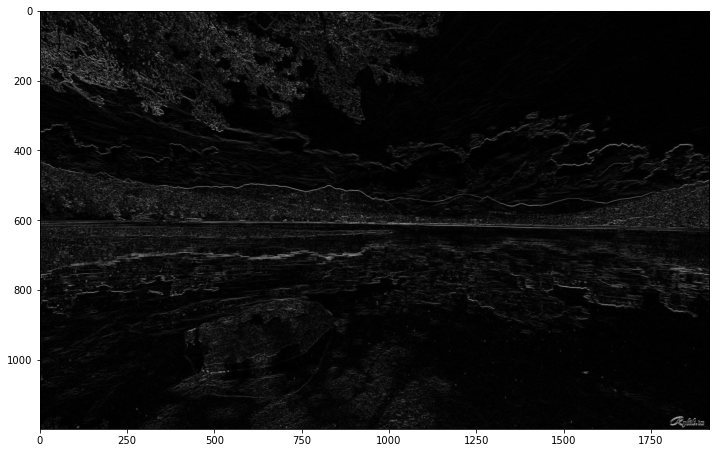

In [18]:
plt.figure(figsize=(12, 12))
plt.imshow(np.abs(out_img), cmap='gray');

Увеличим кадр

In [19]:
img_crop = np.copy(img[910:1180, 920:1250])
print(img_crop.shape)

(270, 330, 3)


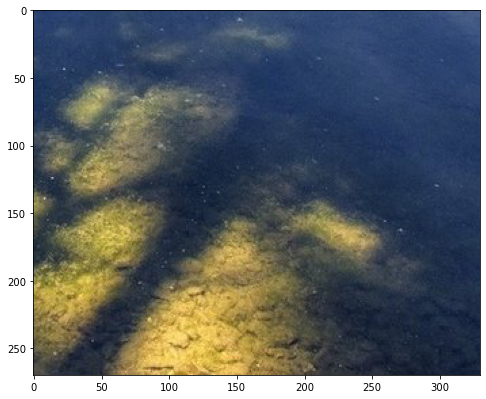

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop, cmap='gray');

Контрастность

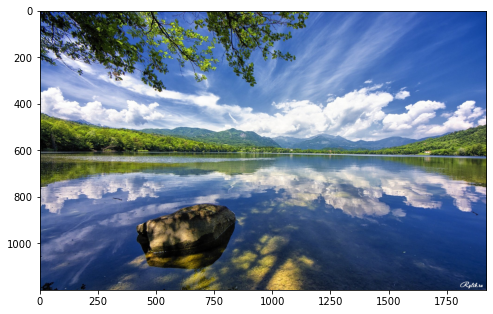

In [22]:
img_32 = img.astype(np.float32) / 255.
plt.figure(figsize=(8, 8))
plt.imshow(img_32);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


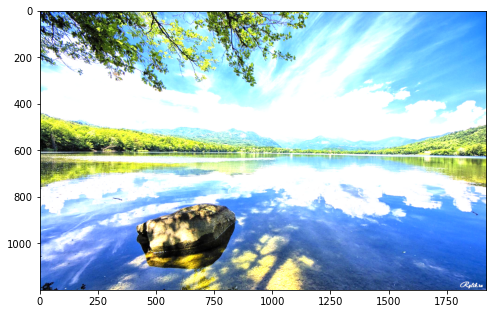

In [23]:
plt.figure(figsize=(8, 8))
plt.imshow(img_32*2);

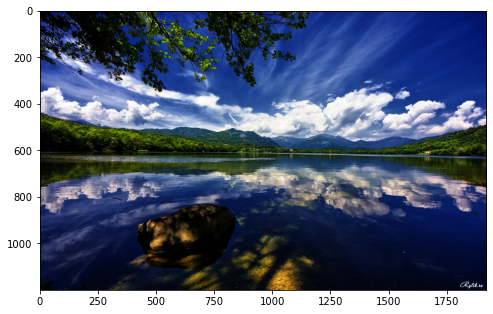

In [25]:
plt.figure(figsize=(8, 8))
plt.imshow(img_32**2);

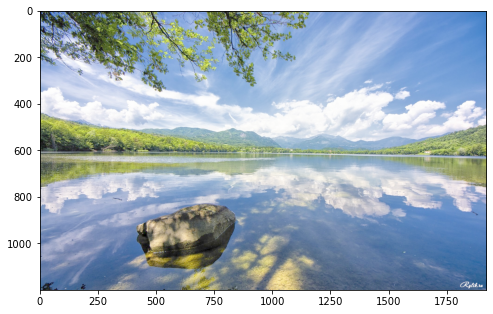

In [27]:
plt.figure(figsize=(8, 8))
plt.imshow(img_32**0.5);